Grant Waldow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/CS760/HW3

/content/drive/MyDrive/CS760/HW3


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

This was just to calculate and 'draw' the ROC curve for Q1.5a

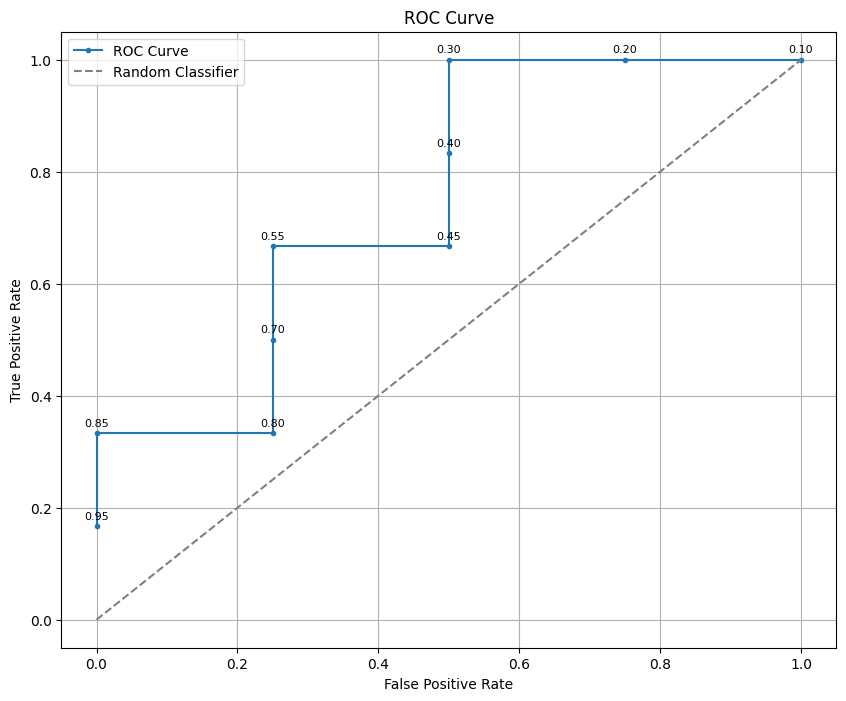

In [ ]:
y_scores=[0.95,
0.85
,0.8
,0.7
,0.55
,0.45
,0.4
,0.3
,0.2
,0.1 ]
y_true = [1,
1,
0 ,
1 ,
1 ,
0 ,
1 ,
1 ,
0 ,
0 ]

def calculate_roc_thresholds(y_true, y_scores):
    thresholds = sorted(y_scores, reverse=True)
    tpr_values = []
    fpr_values = []

    for threshold in thresholds:
        y_pred = [1 if score >= threshold else 0 for score in y_scores]

        TP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
        FN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)
        FP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
        TN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)

        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        tpr_values.append(TPR)
        fpr_values.append(FPR)

    return fpr_values, tpr_values, thresholds

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = calculate_roc_thresholds(y_true, y_scores)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, marker='.', label='ROC Curve', linestyle='-')

    for i, threshold in enumerate(thresholds):
        plt.annotate(f"{threshold:.2f}", (fpr[i], tpr[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve(y_true, y_scores)


# Q2.1

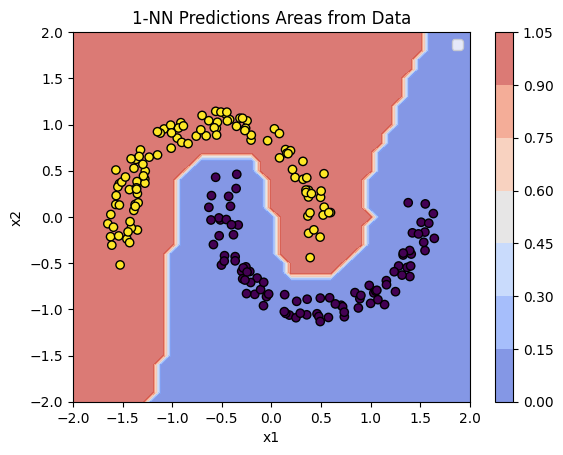

In [ ]:


data = np.loadtxt('D2z.txt')
X_train = data[:, :2]
y_train = data[:, 2]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# dummy points
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
xx, yy = np.meshgrid(x, y)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Find 1NNs
predictions = []
for point in grid_points:
    distances = [euclidean_distance(point, train_point) for train_point in X_train]
    nearest_neighbor_idx = np.argmin(distances)
    predictions.append(y_train[nearest_neighbor_idx]) # get the 1NN's class label as our prediction

predictions = np.array(predictions).reshape(xx.shape)

#plot - use contour to get the area of a class labeling using the dummy points
plt.contourf(xx, yy, predictions, alpha=0.7, cmap=plt.cm.coolwarm)
plt.colorbar()

# 6. Overlay the training set on the plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('1-NN Predictions Areas from Data')
plt.show()


#Q2.2

In [11]:
def calc_accuracy(y_true, y_pred):
    correct_predictions = sum([true == pred for true, pred in zip(y_true, y_pred)])
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

def calc_precision(y_true, y_pred):
    TP = sum([true == 1 and pred == 1 for true, pred in zip(y_true, y_pred)])
    FP = sum([true == 0 and pred == 1 for true, pred in zip(y_true, y_pred)])
    return TP / (TP + FP)

def calc_recall(y_true, y_pred):
    TP = sum([true == 1 and pred == 1 for true, pred in zip(y_true, y_pred)])
    FN = sum([true == 1 and pred == 0 for true, pred in zip(y_true, y_pred)])
    return TP / (TP + FN)


In [19]:


# Load the dataset
data = pd.read_csv("emails.csv")
data = data.drop(data.columns[0],axis=1)

# 1NN
def one_nearest_neighbor(train_X, train_y, test_X):
    predictions = []
    for test_row in test_X:
        distances = np.linalg.norm(train_X - test_row, axis=1)  # Compute all distances using broadcasting - speeds it up slightly
        min_index = np.argmin(distances)
        predictions.append(train_y[min_index])
    return predictions

results = []

for i in range(5):
    # Split into train and test
    if i == 0:
        test_set = data.iloc[0:1000]
        train_set = data.iloc[1000:]
    else:
        test_set = data.iloc[i*1000: (i+1)*1000]
        train_set = pd.concat([data.iloc[:i*1000], data.iloc[(i+1)*1000:]])

    #Remove class labels
    test_X = test_set.drop(columns=["Prediction"]).values
    test_y = test_set["Prediction"].values
    train_X = train_set.drop(columns=["Prediction"]).values
    train_y = train_set["Prediction"].values

    predictions = one_nearest_neighbor(train_X, train_y, test_X)

    # Metrics
    accuracy = calc_accuracy(test_y, predictions)
    precision = calc_precision(test_y, predictions)
    recall = calc_recall(test_y, predictions)

    results.append((accuracy, precision, recall))
    print(f"fold {i} complete")

# Print
for i, (acc, prec, rec) in enumerate(results, 1):
    print(f"Fold {i} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")


fold 0 complete
fold 1 complete
fold 2 complete
fold 3 complete
fold 4 complete
Fold 1 - Accuracy: 0.8250, Precision: 0.6545, Recall: 0.8175
Fold 2 - Accuracy: 0.8530, Precision: 0.6857, Recall: 0.8664
Fold 3 - Accuracy: 0.8620, Precision: 0.7212, Recall: 0.8380
Fold 4 - Accuracy: 0.8510, Precision: 0.7164, Recall: 0.8163
Fold 5 - Accuracy: 0.7750, Precision: 0.6057, Recall: 0.7582


#Q2.3

In [12]:

# sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500) # getting huge z values?
    return 1 / (1 + np.exp(-z))

# loss for logistic regression
def cost_function(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) # was getting warnings, this is for stabilization
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Use this to normazile the features wit z-score normalization.
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    std_modified = np.where(std==0, 1, std) # avoid division by zero

    scaled_X = (X - mean) / std_modified # z = (x-feature_mean)/S.D.
    return scaled_X, mean, std

# Logistic Regression w/ gradient descent
# learning rate = alpha
# do 1000 steps for gradient descent
# This method just returns the weight vector theta that is optimal for LR (found with GD)
def logistic_regression_GD(X, y, alpha=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(num_iterations):
        y_pred = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost_history.append(cost_function(y, y_pred))
    return theta, cost_history


data = pd.read_csv("emails.csv")
data = data.drop(data.columns[0],axis=1)
X = data.drop(columns=["Prediction"]).values
scaled_X, _, _ = standard_scaler(X)
scaled_X = np.c_[np.ones(scaled_X.shape[0]), X]  # Add intercept (column of ones)
y = data["Prediction"].values

# Train and test on 5 folds.
results = []
num_iterations = 1000
alpha = 0.01

for i in range(5):
    start_idx = i * 1000
    end_idx = (i + 1) * 1000
    test_X = X[start_idx:end_idx]
    test_y = y[start_idx:end_idx]
    train_X = np.vstack([X[:start_idx], X[end_idx:]])
    train_y = np.hstack([y[:start_idx], y[end_idx:]])

    theta, _ = logistic_regression_GD(train_X, train_y, alpha, num_iterations)
    predictions = sigmoid(np.dot(test_X, theta))
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions] # prediction threshold = 0.5

    accuracy = calc_accuracy(test_y, binary_predictions)
    precision = calc_precision(test_y, binary_predictions)
    recall = calc_recall(test_y, binary_predictions)

    results.append((accuracy, precision, recall))
    print(f"fold {i} complete")

# Report results for each fold
for i, (acc, prec, rec) in enumerate(results, 1):
    print(f"Fold {i} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")


fold 0 complete
fold 1 complete
fold 2 complete
fold 3 complete
fold 4 complete
Fold 1 - Accuracy: 0.9150, Precision: 0.8876, Recall: 0.8035
Fold 2 - Accuracy: 0.8930, Precision: 0.8295, Recall: 0.7726
Fold 3 - Accuracy: 0.8910, Precision: 0.8182, Recall: 0.7923
Fold 4 - Accuracy: 0.8340, Precision: 0.9267, Recall: 0.4728
Fold 5 - Accuracy: 0.8510, Precision: 0.7918, Recall: 0.6961


#Q2.4

k = 1: Average Accuracy = 0.8344
k = 3: Average Accuracy = 0.8410
k = 5: Average Accuracy = 0.8418
k = 7: Average Accuracy = 0.8452
k = 10: Average Accuracy = 0.8558


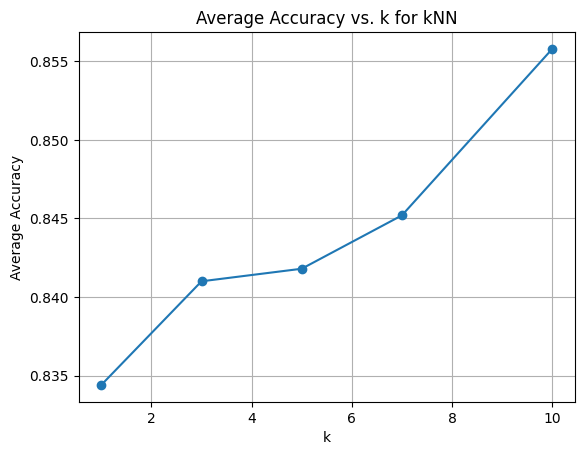

In [13]:

data = pd.read_csv("emails.csv")
data = data.drop(data.columns[0], axis=1)
X = data.drop(columns=["Prediction"]).values
y = data["Prediction"].values

def kNN(X_train, y_train, X_test, k):
    y_pred = []
    for test_sample in X_test:
        distances = np.linalg.norm(X_train - test_sample, axis=1) # distance comp speedup
        k_indices = distances.argsort()[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        majority_vote = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(majority_vote)
    return np.array(y_pred)

# compactifying this so we can try with different k
def k_fold_cross_val(X, y, k, folds=5):
    fold_size = len(X) // folds
    accuracies = []

    for i in range(folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_test, y_test = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])

        y_pred = kNN(X_train, y_train, X_test, k)
        accuracy = np.mean(y_test == y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

# Vary k and get avg accuracy
k_values = [1, 3, 5, 7, 10]
avg_accuracies = []

for k in k_values:
    avg_accuracy = k_fold_cross_val(X, y, k)
    avg_accuracies.append(avg_accuracy)
    print(f"k = {k}: Average Accuracy = {avg_accuracy:.4f}")

# Plot
plt.plot(k_values, avg_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. k for kNN')
plt.grid(True)
plt.show()


#Q2.5

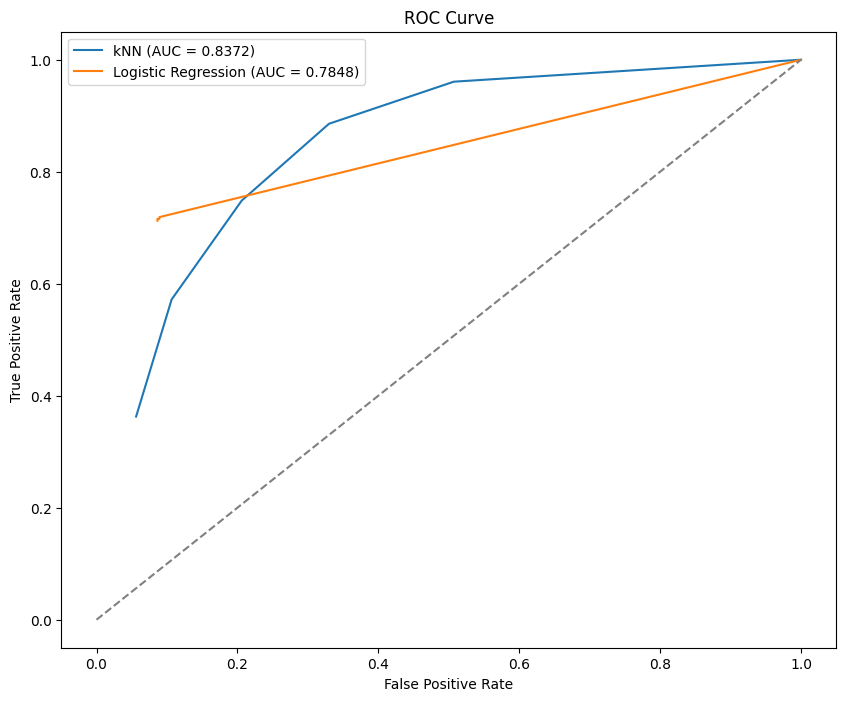

In [15]:

data = pd.read_csv("emails.csv")
data = data.drop(data.columns[0], axis=1)
X = data.drop(columns=["Prediction"]).values
y = data["Prediction"].values

# Just 1 split will be used
train_size = 4000
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5NN - In order to make an ROC curve, we have to be able to set a threshold for positive prediction; we need a version of KNN that predicts off sum(positive_neighbors)/total_neighbors
def kNN_proba(X_train, y_train, X_test, k):
    y_pred_probs = []
    for test_sample in X_test:
        distances = np.linalg.norm(X_train - test_sample, axis=1) # distance comp speedup
        k_indices = distances.argsort()[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        prob_positive = sum(k_nearest_labels) / k
        y_pred_probs.append(prob_positive)
    return np.array(y_pred_probs)


def logistic_regression(X_train, y_train, X_test, num_iterations=1000, learning_rate=0.01):
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)
    for _ in range(num_iterations):
        linear_pred = np.dot(X_train, weights)
        predictions = sigmoid(linear_pred)
        gradient = np.dot(X_train.T, (predictions - y_train))
        weights -= learning_rate * gradient
    return sigmoid(np.dot(X_test, weights))

# 4. Get predicted probabilities
knn_probs = kNN_proba(X_train, y_train, X_test, 5)
logistic_probs = logistic_regression(X_train, y_train, X_test)

# ROC
def compute_roc(y_true, y_scores):
    thresholds = sorted(np.unique(y_scores), reverse=True)
    fpr, tpr = [], []

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1)) # true pos
        tn = np.sum((y_pred == 0) & (y_true == 0)) # true neg
        fp = np.sum((y_pred == 1) & (y_true == 0)) # false pos
        fn = np.sum((y_pred == 0) & (y_true == 1)) # false neg
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return fpr, tpr

# Manual AUC computation
def compute_auc(fpr, tpr):
    n = len(fpr)
    auc_val = 0.0
    for i in range(1, n):
        auc_val += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2
    return auc_val

# Compute ROC curves and AUC values
fpr_knn, tpr_knn = compute_roc(y_test, knn_probs)
fpr_logistic, tpr_logistic = compute_roc(y_test, logistic_probs)

auc_knn = compute_auc(fpr_knn, tpr_knn)
auc_logistic = compute_auc(fpr_logistic, tpr_logistic)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {auc_knn:.4f})')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

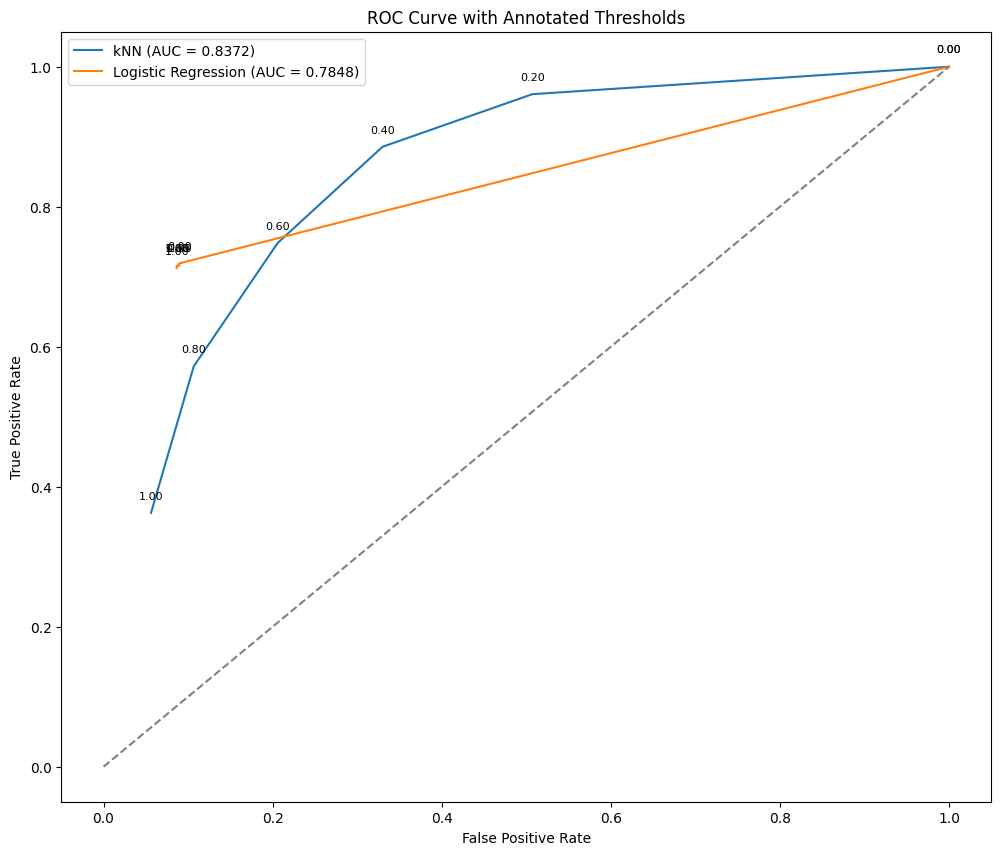

In [18]:
# Plotting again but with threshold annotations
plt.figure(figsize=(12, 10))
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {auc_knn:.4f})')
thresholds_knn = sorted(np.unique(knn_probs), reverse=True)
# for knn
for i, (x, y) in enumerate(zip(fpr_knn, tpr_knn)):
    plt.annotate(f'{thresholds_knn[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
# for LR
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.4f})')
thresholds_logistic = sorted(np.unique(logistic_probs), reverse=True)
for i, (x, y) in enumerate(zip(fpr_logistic, tpr_logistic)):
        plt.annotate(f'{thresholds_logistic[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Annotated Thresholds')
plt.legend()
plt.show()